# Visualizing Predictive Models for Users

Welcome to `Heart AI`, the latest and greatest dating app start-up. We're building a machine learning model to predict which user to match with which other user in speed dating events. We've gathered some existing data from a few in-person speed dating events, in which participants record their hobbies, demographic details, and level of interest in other participants they've met. Before we engineer the back-end, we'd like you, our resident Human-AI Interaction expert, to implement a few sample visualizations so we know what features to support.

## The Data 
`dates.csv` contains 8,378 entries from our pilot test data at heterosexual speed dating events at Columbia University from 2002-2004. In these events, each participant met each of all opposite-gender participants for four minutes. The number of speed dates dates varied by the event, on average there were 15, but it could be as few as 5 or as many as 22. Afterward, each participant was asked if they would like to meet any of their speed dating partners again. They also provided ratings on six **attributes** about each speed date:

- Attractiveness
- Sincerity
- Intelligence
- Fun
- Ambition
- Shared Interests

The dataset also includes varying participants' perspectives on those attributes, along with other demographic information and hobbies as described below. 

Each row of the dataset is a speed date, and since participants have multiple dates, they appear in the dataset multiple times. Each column is described below:

| Column Header       | Description     |
| :------------- |  ----------: | 
|  iid | Numerical ID unique to this person   |
| gender   | This participant's self-reported gender (f = female)|
| age | Age in years of this participant |
| race | This person's race |
| field | This person's field of study |
| income | The median household income of the zipcode where this person grew up |
| from | Where this person is originally from |
| tot_rounds | The total number of speed dating rounds (i.e., num speed dates)
| round_num | Index of which speed date of the event (first, second , third...)|
| pid | The partner's unique numerical ID |
| age_partner | The partner's age |
| race_partner | The partner's race |
| same_race | Whether this participant and the partner are the same race (y = yes)|
| request | This participant would like to meet this partner in a follow-up date |
| request_partner | The partner would like to meet this partner in a follow-up date |
| match | Both participants would like a follow-up meeting |
| like | How much this person liked this partner |
| prob_yes | This person's self-reported probability the partner will say yes to a 2nd date |
| like_partner | How much the partner liked this person |
| prob_yes_partner | The partner's probability this person will say yes to a 2nd date |

The next 5 columns all relate to the six attribute ratings listed above: how the participant rated themself. You can find the attribute ratings for how each participant rated their partner, and how the partner rated the participant in the `data/dates_large.csv` file, if you need them:

| Attribute Header       | Description     |
| :------------- |  ----------: | 
| attractive_self | Rating of Attractiveness this person gave them self |
| sincere_self | Rating of Sincerity this person gave them self |
| intelligence_self | Rating of Intelligence this person gave them self |
| fun_self | Rating of Fun the partner this person gave them self |
| ambitious_self | Rating of Ambition this person gave them self |
| attractive | Rating of Attractiveness this person gave to their partner |
| sincere | Rating of Sincerity this person gave to their partner |
| intelligence | Rating of Intelligence this person gave to their partner |
| fun | Rating of Fun this person gave to their partner |
| ambitious | Rating of Ambition this person gave to their partner |
| shared_interests | Rating of Shared Interests this person gave to their partner |
| attractive_partner | Rating of Attractiveness the partner gave to this person |
| sincere_partner | Rating of Sincerity the partner gave to this person |
| intelligence_partner | Rating of Intelligence the partner gave to this person |
| fun_partner | Rating of Fun the partner gave to this person |
| ambitious_partner | Rating of Ambition the partner gave to this person |
| shared_interests_partner | Rating of Shared Interests the partner gave to this person |

The next 17 columns are the participant's answer to the question _"How **interest**ed are you in the following activities, on a scale of 1-10?"_: sports (Playing sports/ athletics), tvsports (Watching sports), excercise, dining (Dining out), museums (Museums/galleries), art, hiking (Hiking/camping), gaming, clubbing (Dancing/clubbing), reading, tv (Watching TV), theater, movies, concerts (Going to concerts), music, shopping, and yoga (yoga/meditation). The numerical answers to these questions are recorded in the last 17 columns with the column head appended with `_num`. The low, moderate, high categories were determined based on quartiles: less than quartile 1 = `low`, less than quartile 3 = `moderate`, otherwise `high`. 



---

---

---

## Part 1: Explore & Visualize 
_50% of the total effort on this assignment._

The goal of these tasks are to experiment with different ways of visualizing data. Show your work in code as well as your final visualizations in this notebook. Include answers to all questions.

If you’ve never visualized in Python, here are some helpful resources, **review** these first!
- The `pandas` module has some visualization support: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html 
- You can also use Matplotlib, which is incredibly powerful: https://matplotlib.org/gallery/index.html 

_Remember_, if you're going to borrow and adapt code from a resource likes these, make sure you know what the code is doing before you adapt it. That way you get meaningful outcomes, rather than illegible graphs and data!


In [4]:
import pandas as pd # import pandas library
df = pd.read_csv('data/dates.csv', low_memory=False) # read the csv file into a pandas dataframe object

Recall from Assignment 1 the data exploration methods from the `pandas` module we used previously:

- `df.head()` will show us the first 5 rows of our dataset. You can also specify the first N rows, like `df.head(18)` will show us the first 18 rows.
- `df.sample(10)` will show us 10 randomly sampled rows of our dataset
- `df.shape` will tell us how many rows and how many columns are in the dataset
- `df.columns` will list the names of all columns in the dataset
- `df.describe()` will give you summary statistics about all numerical columns in the dataset

_Actually_, you'll need to recall many things from Assignment 1. Maybe take a few minutes to review it!

In [44]:
# Complete data exploration here (optional)
df.describe() 


,iid,age,income,tot_rounds,round_num,pid,age_partner,like,prob_yes,like_partner,...,gaming_num,clubbing_num,reading_num,tv_num,theater_num,movies_num,concerts_num,music_num,shopping_num,yoga_num
count,8378.000000,8283.000000,4279.000000,8378.000000,8378.000000,8368.000000,8274.000000,8138.000000,8069.000000,8128.000000,...,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000
mean,283.675937,26.358928,44887.606450,16.872046,8.963595,283.863767,26.364999,6.134087,5.207523,6.134498,...,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197
std,158.583367,3.566763,17206.920962,4.358458,5.491068,158.584899,3.563648,1.841285,2.129565,1.841258,...,2.620507,2.502218,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612
min,1.000000,18.000000,8607.000000,5.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,154.000000,24.000000,31516.000000,14.000000,4.000000,154.000000,24.000000,5.000000,4.000000,5.000000,...,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000
50%,281.000000,26.000000,43185.000000,18.000000,8.000000,281.000000,26.000000,6.000000,5.000000,6.000000,...,3.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000
75%,407.000000,28.000000,54303.000000,20.000000,13.000000,408.000000,28.000000,7.000000,7.000000,7.000000,...,6.000000,8.000000,9.000000,7.000000,9.000000,9.000000,8.000000,9.000000,8.000000,7.000000
max,552.000000,55.000000,109031.000000,22.000000,22.000000,552.000000,55.000000,10.000000,10.000000,10.000000,...,14.000000,10.000000,13.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Task 1a. Create a histogram of speed date participant counts by age. 
_5% effort._

A [histogram](https://en.wikipedia.org/wiki/Histogram) shows _counts_ of values in a bar chart form. This histogram will let us see if most of the participants are younger or older. One axis should be a sorted continuous range of the youngest person in the dataset to the age of the oldest person in the dataset. The other axis should be the counts for each age. Remember your axes labels! 

_Hint_: Recall each row of the data is a speed date, not one person (`iid`). Each person will appear in the dataset 5 to 22 times. You may want to look into [`pandas drop_duplicates()`](https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/) so you don't double/quintuple count anyone!

_Hint_: You may need to `import matplotlib.pyplot as plt` and use `plt.xlabel` and `plt.title` methods to add labels to your histogram. This works even for the `pandas DataFrame.hist` method!

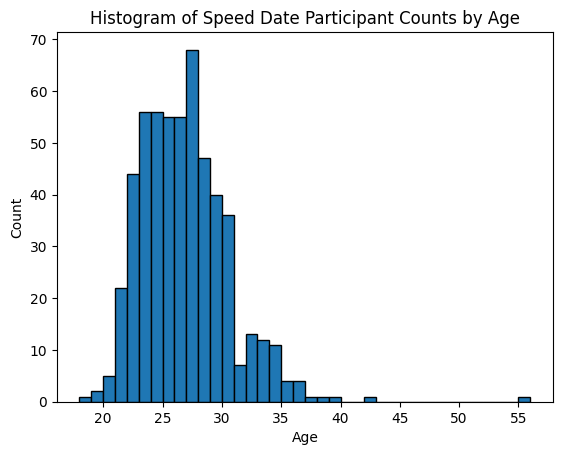

In [12]:
# Python code that creates the described histogram:
import matplotlib.pyplot as plt
# Saving dates with duplicates:
dates = df
# Dropping duplicates
unique_dates = df.drop_duplicates(subset='iid')

#Creating a histogram
unique_dates['age'].hist(bins=range(int(unique_dates['age'].min()), int(unique_dates['age'].max() + 2)), edgecolor='black')
plt.title('Histogram of Speed Date Participant Counts by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(False)
plt.show()

### Task 1b. Create a histogram of participant counts by age, split by gender. 
_8% effort._

This histogram will show us the distribution of speed dating participants by age, one histogram for each gender in the dataset.

_Hint_: It may make sense to reuse the dataframe plotted from Task 1a, but perhaps add an informative column. When using `pandas DataFrame.hist()` method, these two histograms can be generated with ~1 line of code + [a few lines extra to add axes labels](https://stackoverflow.com/questions/42832675/setting-axis-labels-for-histogram-pandas) + 1 line to `ax.set_ylim((0,UPPER_Y_LIMIT))` and set the y-axes labels to be the same.

<Figure size 1200x700 with 0 Axes>

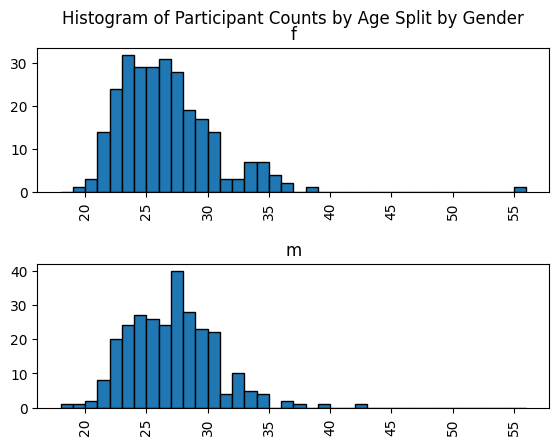

In [8]:
# Creating a histogram of participant counts by age, split by gender
plt.figure(figsize=(12, 7))
unique_dates.hist(column='age', by='gender', bins=range(int(unique_dates['age'].min()), int(unique_dates['age'].max()) + 2), edgecolor='black', layout=(2,1))
plt.suptitle('Histogram of Participant Counts by Age Split by Gender')
plt.show()


When shown data or an ML model, humans tend to have _confirmation bias_, meaning that they tend to believe that whatever the data or model says is what they really thought all along. Ever broke up with a significant other and your friends tell you "I told you so"? This is confirmation bias. With Bayesian reasoning, we can take into account a viewer’s prior reasonable guess before they see data. This is a good technique to help users reflect on how the data might conflict with "what they thought all along." 

### Task 1c. Record prior: female ages --> successful matches.
_2% effort._

Write down what you believe (before looking at the data. Just guess!) is the relationship between female participant age and number of successful matches. Do you expect successful matches to be the same across all ages or higher in certain age ranges? Why?

_Hint:_ Do we have any information that can inform our priors?

I think the younger the lady (about 18 to 25), the more likes she gets but she also becomes all the more picky, which can result in an overchoice situation. Hence I wouldn't be surprised to find that there is not as much matching for younger women. So, it might end up being similar to that other older women. 

### Task 1d. Record prior: male ages --> successful matches.
_2% effort._

Write down what you believe (before looking at the data. Just guess!) is the relationship between male participant age and number of successful matches. Do you expect successful matches to be the same across all ages or higher in certain age ranges? Why?

_Hint:_ Do we have any information that can inform our priors?

I think the higher the age, the more matches the guy will get. As he would likely be more attractive to the ladies due to the higher probability of having had more experiences.

### Task 1e. Generate histograms of priors.
_5% effort._

1. Create a histogram of successful matches female participants had by age. 
2. Create a histogram of successful matches male participants had by age. 

We're now interested in data at the match level, rather than the individual level. If you previously dropped duplicate `iid`s, you may want to update your data to include them so you can count _every_ match, not just the first one!

_Hint_: You might find it helpful to figure out how to [filter out values by a conditional using pandas](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/).

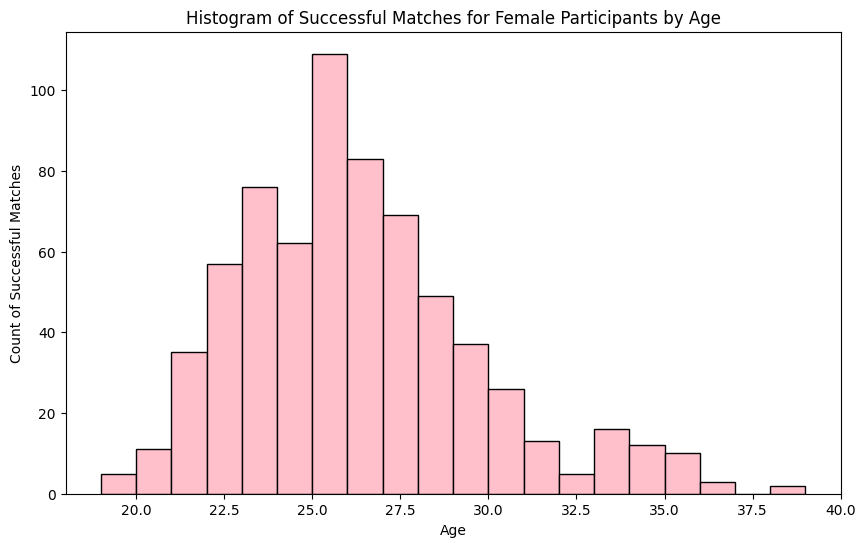

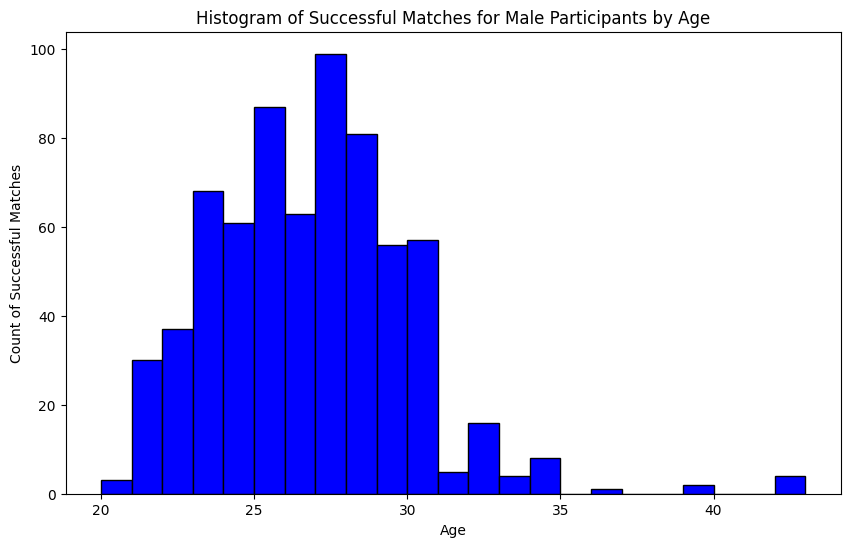

In [13]:
# Code that generates histograms 1 & 2:
# Filtering the DataFrame for successful matches
successful_matches = dates[dates['match'] == 'y']

# Filtering by gender for female and male successful matches
female_matches = successful_matches[successful_matches['gender'] == 'f']
male_matches = successful_matches[successful_matches['gender'] == 'm']

# (1) Histogram of successful matches for female participants by age
plt.figure(figsize=(10, 6))
female_matches['age'].hist(bins=range(int(female_matches['age'].min()), int(female_matches['age'].max()) + 2), edgecolor='black', color='pink')
plt.title('Histogram of Successful Matches for Female Participants by Age')
plt.xlabel('Age')
plt.ylabel('Count of Successful Matches')
plt.grid(False)
plt.show()

# (2) Histogram of successful matches for male participants by age
plt.figure(figsize=(10, 6))
male_matches['age'].hist(bins=range(int(male_matches['age'].min()), int(male_matches['age'].max()) + 2), edgecolor='black', color='blue')
plt.title('Histogram of Successful Matches for Male Participants by Age')
plt.xlabel('Age')
plt.ylabel('Count of Successful Matches')
plt.grid(False)
plt.show()

### Task 1f. Compare priors with histograms.
_8% effort._

Compare your prior guess in 1c and 1d to the histograms in 1e. What did you learn from the histograms? Are there parts of your prior guess that were confirmed by the histograms? Are there parts of your prior guess that were wrong or different than you expected?

_Hint:_ Think critically about the data, and whether the histograms we built are adequate for supporting/disproving our priors.

**ANSWER:** I think that my opinion of Younger women being more picky is shown in an almost linear manner. Again, this could come of as confirmation bias. But, if we look at the Histogram of Successful Matches for males, we see that men at around 25 to 30 get way more matches than men in the 20 to 25 range. Meaning, many women are picking them just as they are picking many other women. But this is mostly confirmation bias. I could further show effects of income and attractiveness. However, the age range of 25 to about 30 is the apex of youthfullness, attractivenss and income. Hence, both men and women in this range are more likely to be the perfect for every age group, including themselves.

When users see different possibilities separately in a data or ML system, there’s a bias towards thinking _all possibilities are equally likely_, when really some options are more or less probable in real life. e.g., While a headache could be caused by autumn allergies or by brain cancer, the likelihood of allergies is far higher in real life than brain cancer.

### Task 1g.
_20% effort._

Create a visualization of _your choice_, allowing users to examine how different personal features correlate with successful matches with increasing age. Overlay 4 different participant demographics in the same plot, with age as the x-axis and including only data from successful matches. Design this visualization however you wish. Justify your design by writing a few sentences about how your visualization will help users compare the 4 different attributes by age. Talk about encoding choices such as: plot type, use of size, color, and axes labels. Are there any flaws in your visualization?

_Examples_: This could be a stacked histogram showing the number of successful matches by the 4+ participant races in the dataset, or it could be the mean of 4 different interests overlayed in the same line chart, or you could look at the self-ratings along the attributes, or you could consider adding columns to the dataset that might provide additional insights! Explore the data and generate something interesting to you!

_Hint_: You **must** organize your data into a format similar to what you want the visualization to show. The [pandas `DataFrame.groupby`](https://www.geeksforgeeks.org/pandas-groupby/) method can be very useful here!

_Hint_: Is it okay for each participant to appear in the data repeatedly (i.e., 5-22 times) for this plot?

**ANSWER:** 
- I made histograms (facetgrid) to perceive how income quartile could be affecting your match frequence depending on whether you are a man or woman.
- Hence, way more likely that a more women are matching to the same smaller set of men.
- I did the same to perceive how education levels could be affecting your match frequency depending on whether you are a man or woman.
- Overall, women are getting a lot of matches compared to men. 
- As for education, there were more matches for men than for women in the STEM field, probably demonstrating the lower number of women in the STEM Field in the dataset. 
Citation/Note: I could have used matplotlib.pyplot for the boxplot, however, Using Seaborn returned more appealing results.
reference: https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

C:\Users\Bernard\AppData\Local\Temp\ipykernel_18132\3636372128.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_matches['income_quartile'] = pd.qcut(successful_matches['income'].rank(method='first'), 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


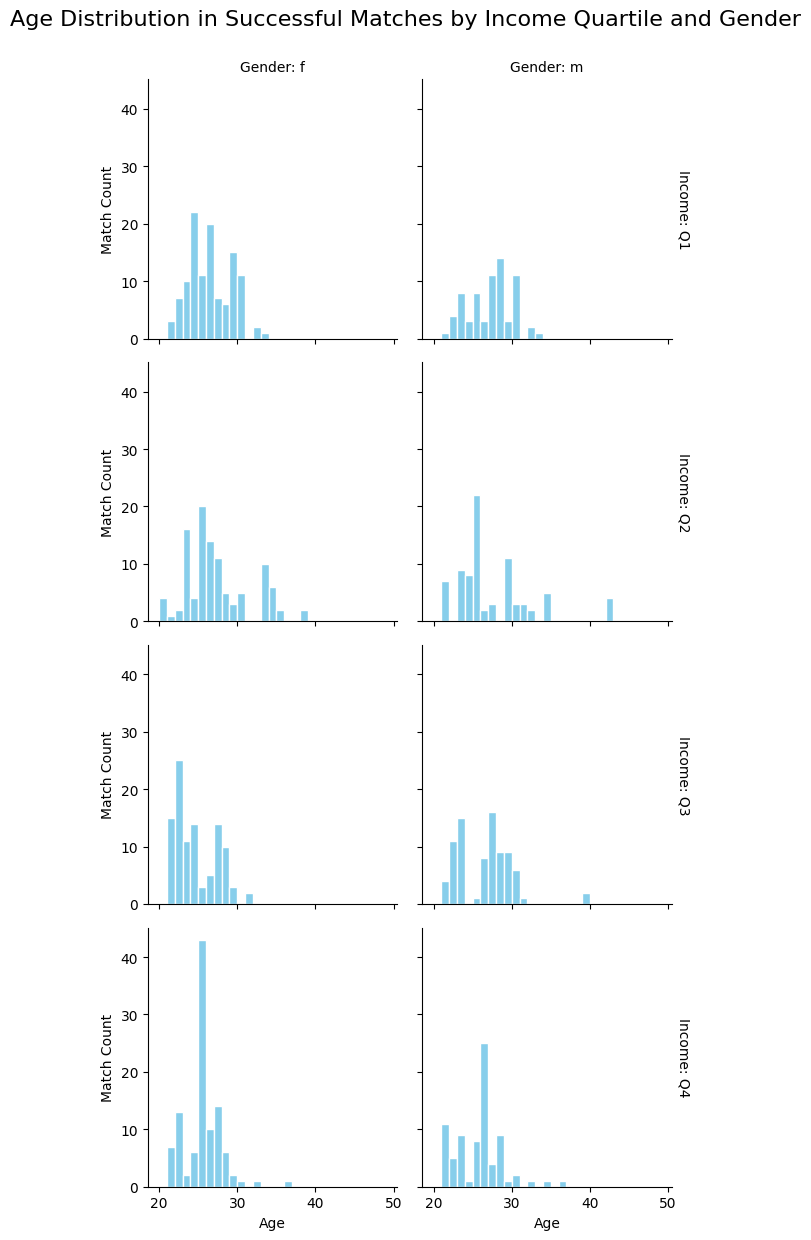

C:\Users\Bernard\AppData\Local\Temp\ipykernel_18132\3636372128.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_matches['education_level'] = successful_matches['field'].apply(map_education)


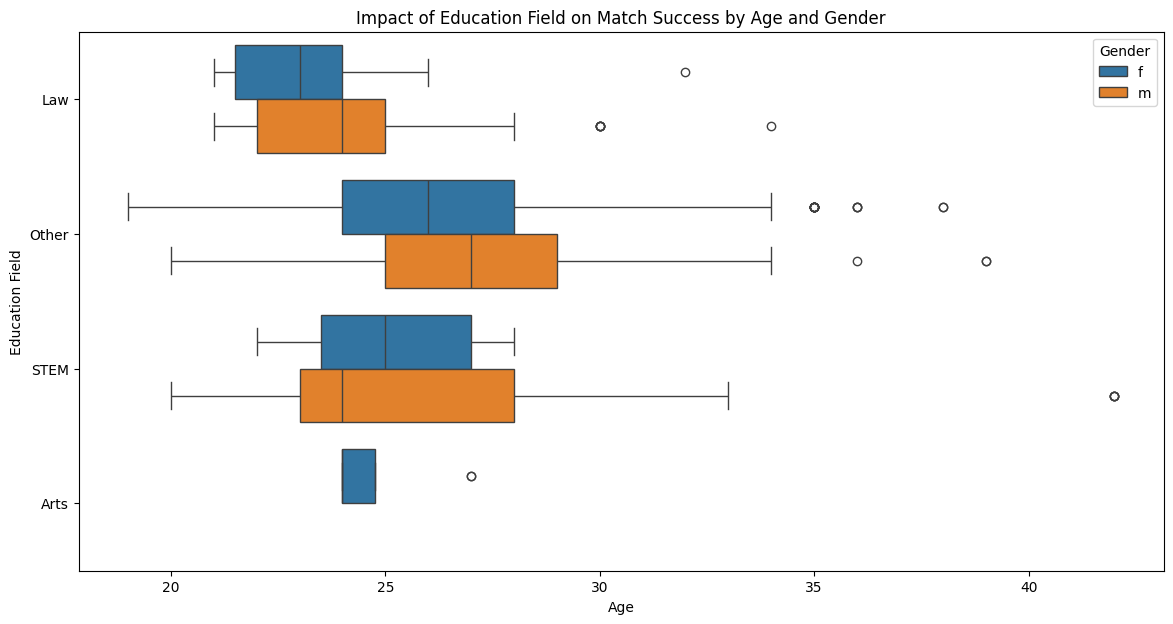

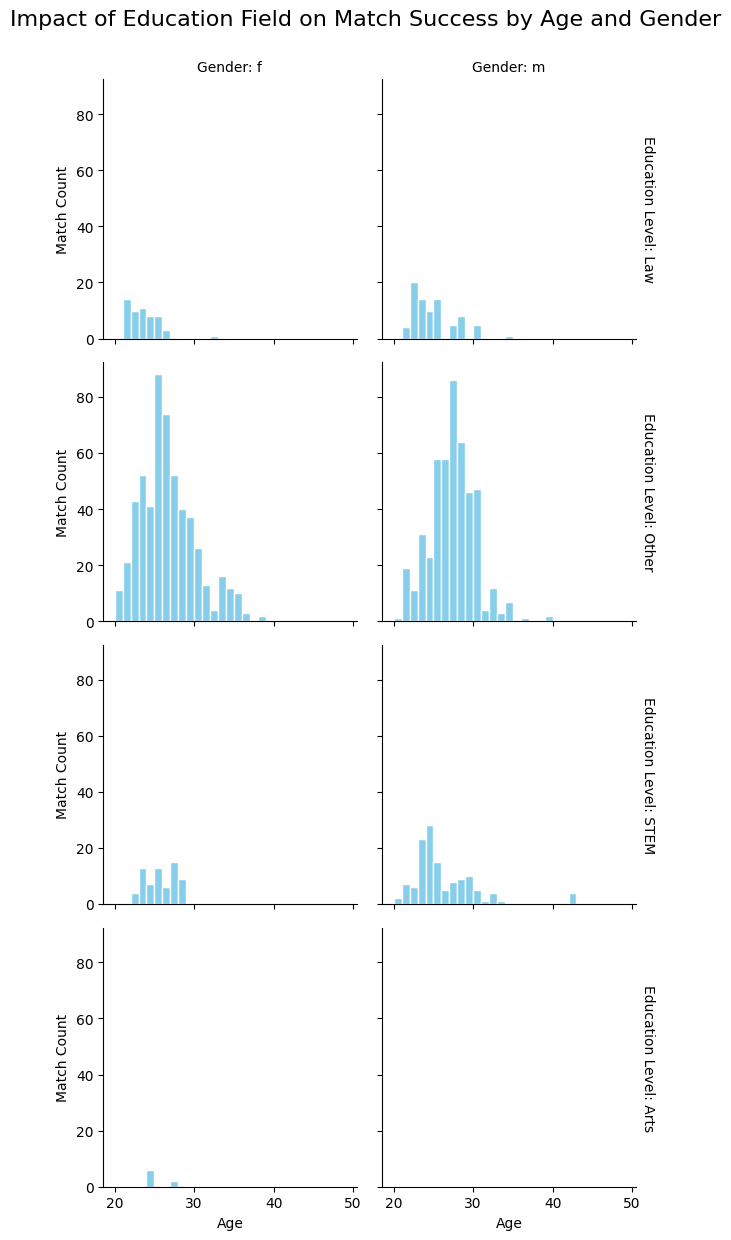

In [32]:
# Code that generates your visualization:
import seaborn as sns
import numpy as np
# Filtering the DataFrame for successful matches
successful_matches = dates[dates['match'] == 'y']
# Preparing data: Categorize income into quantiles
successful_matches['income_quartile'] = pd.qcut(successful_matches['income'].rank(method='first'), 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

#FacetGrid of the impact of income on match by gender
palette = {'f': 'pink', 'm': 'blue'}
g_income = sns.FacetGrid(successful_matches, row='income_quartile', col='gender', margin_titles=True, palette= palette)
# Histogram plot for the 'age' column
g_income.map(plt.hist, 'age', bins=np.arange(20, 50, 1), color= "skyblue", edgecolor='white')

# Titles and labels
g_income.figure.suptitle('Age Distribution in Successful Matches by Income Quartile and Gender', fontsize=16, y=1.03)
g_income.set_axis_labels('Age', 'Match Count')
g_income.set_titles(row_template='Income: {row_name}', col_template='Gender: {col_name}')
plt.show()
#Grouping Education Field into STEM, Law, Arts, and Other
def map_education(field):
    if 'Engineering' in field or 'Computer' in field or 'Science' in field:
        return 'STEM'
    elif 'Law' in field:
        return 'Law'
    elif 'Art' in field or 'Music' in field or 'Design' in field:
        return 'Arts'
    else:
        return 'Other'

successful_matches['education_level'] = successful_matches['field'].apply(map_education)
# Box plot comparing how education field impacts matching between men and women across ages
plt.figure(figsize=(14, 7))
sns.boxplot(x='age', y='education_level', hue='gender', data=successful_matches)
plt.title('Impact of Education Field on Match Success by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Education Field')
plt.legend(title='Gender')
plt.show()



# FacetGrid of the impact of education
gender_palette = {'f': 'pink', 'm': 'blue'}
g_educ = sns.FacetGrid(successful_matches, row='education_level', col='gender', margin_titles=True, palette= gender_palette)
# Map a histogram plot for the 'age' column
g_educ.map(plt.hist, 'age', bins=np.arange(20, 50, 1), color= 'skyblue', edgecolor='white')

# Titles and labels
g_educ.figure.suptitle('Impact of Education Field on Match Success by Age and Gender', fontsize=16, y=1.03)
g_educ.set_axis_labels('Age', 'Match Count')
g_educ.set_titles(row_template='Education Level: {row_name}', col_template='Gender: {col_name}')
g_educ.add_legend()
plt.show()


---

---

---

## Part 2: Designing Personal Predictions
_50% of the total effort on this assignment._

The goal of Part 2 is to start designing an interactive interface, where a user that comes to the `Heart AI` visualization can put in their own information (like age, gender, interests, self-perceived attributes, and so on), and see how their information relates to the possibility of a successful speed date match. 

Show your work in code as well as your final visualizations in this notebook. Include answers to all questions.

The best assignments will have _at least_ one interactive information visualization. To add some minimal interactivity with minimal effort, consider using Jupyter Notebook Widgets: 
- https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html 
- https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
- https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html


### Task 2a. Design for personas. 
_20% effort._

For each of the fictional users given, create a single visualization that provides insight into that user's likely experience at a speed dating event. To experiment with design choices, make each user/visualization pair a different visual encoding that represents different design choices (e.g. try a different plot type for each user group). 

- Morgan is a young black male college student studying Law. 
- Taylor is a 27 year old woman. She greatly enjoys reading and yoga.
- Cal is a white man in his late 20s, who believes he's moderately attractive.
- Reilly is a Psychologist of non-binary gender, who realllly doesn't like going to art museums.

This task may require creativity in how you select your data to be relevant to the selected persona! It may also require creativity in selecting which data to vary/plot in the information visualization. Ideally, these visualizations would all be interactive, but as a minimal requirement, try to make at least one visualization interactive. For those that are static, you might have to think more carefully about what to display!

_Hint_: If the demographic detail for the user is missing from the description, then it could be a good candidate for displaying "What-if" scenarios along that dimension. If it is provided, you could consider showing how slight changes in that information might impact success.

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, clear_output

class Person:
    def __init__(self, name, age=None, gender=None, field=None, race=None, interests=None, attractiveness=None):
        self.name = name
        self.age = age
        self.gender = gender
        self.field = field
        self.race = race
        self.interests = interests if interests else []
        self.attractiveness = attractiveness

    def __str__(self):
        return f"{self.name} - {self.gender}, {self.age}, {self.field}, {self.race}, Interests: {self.interests}, Attractiveness: {self.attractiveness}"

def visualize_person(person):
    data = successful_matches  

    # Filtering data based on the attributes of the person
    if person.age:
        data = data[(data['age'] >= person.age - 2) & (data['age'] <= person.age + 2)]
    if person.gender:
        data = data[data['gender'] == person.gender]
    if person.field:
        data = data[data['field'].str.contains(person.field, case=False, na=False)]
    if person.race:
        data = data[data['race'].str.contains(person.race, case=False, na=False)]
    if person.interests:
        interest_filter = data['interests'].apply(lambda x: any(interest.lower() in x.lower() for interest in person.interests))
        data = data[interest_filter]

# Create widgets for each step
welcome_message = widgets.HTML(
    value = "<h1>Welcome to the Heart AI Visualization Tool!</h1>")

start_button = widgets.Button(description="Start")

name_input = widgets.Text(description="Enter Name:")
age_input = widgets.IntSlider(description='Age:', min=18, max=100, value=30)
gender_input = widgets.Dropdown(options=['Male', 'Female'], description='Gender:')
field_input = widgets.Dropdown(options=['STEM', 'Law', 'Arts', 'Other'], description='Field of Study:')
race_input = widgets.Dropdown(options=[
    "WhiteOrCaucasianAmerican", 
    "BlackOrAfricanAmerican", 
    "AsianOrAsianAmericanOrPacificIslander", 
    "LatinoOrHispanicAmerican", 
    "Other"
], description='Race:')
interests_input = widgets.SelectMultiple(
    options=['Sports', 'TV Sports', 'Exercise', 'Dining', 'Museums', 'Art', 'Hiking', 'Gaming', 'Clubbing', 'Reading', 'TV', 'Theater', 'Movies', 'Concerts', 'Music', 'Shopping', 'Yoga', 'Other'],
    description='Interests:'
)
submit_button = widgets.Button(description="Submit and Visualize")

# Container for the outputs
output_container = widgets.Output()

# Sequential interaction logic
def start_clicked(b):
    clear_output()
    display(name_input, age_input, gender_input, field_input, race_input, interests_input, submit_button)

def submit_clicked(b):
    with output_container:
        clear_output()
        print(f"Hello {name_input.value}!")
        # Here you would call whatever function you need to process the inputs
        print("Processing your data...")  # Placeholder for actual data processing

start_button.on_click(start_clicked)
submit_button.on_click(submit_clicked)

# Displaying the initial UI components
display(welcome_message, start_button, output_container)

'''
def interactive_visualization():
    name_widget = widgets.Text(value='Morgan', description='Name:')
    age_widget = widgets.IntSlider(min=18, max=50, step=1, value=25, description='Age:')
    gender_widget = widgets.Dropdown(options=['m', 'f', 'nb'], value='m', description='Gender:')
    field_widget = widgets.Text(value='Law', description='Field:')
    race_widget = widgets.Text(value='Black', description='Race:')
    interests_widget = widgets.Text(value='', description='Interests:')
    attractiveness_widget = widgets.Text(value='', description='Attractiveness:')

    ui = widgets.VBox([name_widget, age_widget, gender_widget, field_widget, race_widget, interests_widget, attractiveness_widget])

    def update_widgets(change):
        person = Person(name=name_widget.value,
                        age=age_widget.value,
                        gender=gender_widget.value,
                        field=field_widget.value,
                        race=race_widget.value,
                        interests=[interest.strip() for interest in interests_widget.value.split(',')],
                        attractiveness=attractiveness_widget.value)
        visualize_person(person)

    out = widgets.interactive_output(update_widgets, {'change': name_widget})
    display(ui, out)

Morgan = Person('Morgan', age=22, gender='m', field='Law', race='Black')
visualize_person(Morgan)
#interactive vizualization
interactive_visualization()
'''




SyntaxError: unterminated string literal (detected at line 39) (251818702.py, line 39)

In [ ]:
# Code that generates a visualization for Morgan:


In [ ]:
# Code that generates a visualization for Taylor:

In [ ]:
# Code that generates a visualization for Cal:

In [ ]:
# Code that generates a visualization for Reilly:

### Task 2b. Which visualization from 2a do you think is the most successful design? What visualization techniques did you use? What perceptial tasks did you prioritize?
_3% effort._

**ANSWER:** _Double click this text to write your answer to the question here._

### Task 2c.  Limitations
_7% effort._

Given your visualizations in 2a, what would be good questions for a user to ask a personalized visualization from this dataset? What would be some questions that a personalized visualization (with this dataset alone) cannot answer?

**ANSWER:** _Double click this text to write your answer to the question here._

### Task 2d. Best information.
_7% effort._

If users like those in 2a visit the `Heart AI` interactive tool, what information would you have them put in to show the most relevant match success visualization and why?

**ANSWER:** _Double click this text to write your answer to the question here._

### Task 2e. Data processing.
_3% effort._

In the given data, Interest information is pre-binned as low, moderate, high. Is there any other data in this dataset that could be helpful to bin the data? How would you bin it?
What other data processing would this dataset require to answer additional relevant questions?

**ANSWER:** _Double click this text to write your answer to the question here._

### Task 2f. Data use.
_10% effort._

Is the data used in this activity a good choice for `Heart AI`'s pilot testing? Why/Why not? How might it be improved? 

**ANSWER:** _Double click this text to write your answer to the question here._

---

---

---

## Submit your Assignment
Once you've completed all of the above, you're done with assignment 3! You might want to double check that your code works like you expect. You can do this by choosing "Restart & Run All" in the Kernel menu. If it outputs errors, you should go back and check what you've done. Iris needs to be able to run your notebook on her computer!

Once you think everything is set, please upload your final notebook (with all of your code run and output showing), to Glow with filename `[yourunixID]_haiiYY[assignmentnumber].ipynb`, e.g., `ikh1_haii17a3.ipynb`

If you've modified your data file outside of this notebook, please zip it up with your Jupyter Notebook and submit together as one `.zip` file so that I can run it!